# Part II - Factors Influencing Loan Completion
## by Mustapha Aminu Saleh

## Investigation Overview


> This presentation is focused on highlighting the possible determinants for loan completion.
 


## Dataset Overview

> The dataset contains 113,937 loans with 81 variables on each loan. The variables include loan amount, loan status, the occupation of the borrower, the reasons for borrowing and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv("C:/Users/msami/Desktop/prosperLoanData.csv")

In [3]:
# Create a subset of the dataframe with the columns of interest
cols = ["ListingKey", "Term", "LoanStatus", "BorrowerAPR", "BorrowerRate", "ProsperScore",
        "ListingCategory (numeric)","BorrowerState", "Occupation", "EmploymentStatus",
        "EmploymentStatusDuration", "IncomeRange", "StatedMonthlyIncome", "IsBorrowerHomeowner",
        "LoanOriginalAmount", "MonthlyLoanPayment", "Recommendations"]
df =  loan[cols]

In [4]:
# Drop all loans that are still current
df = df[df["LoanStatus"] != "Current"]

# All completed loans will be represented by the integer 1 while 0 for the rest
df["LoanStatus"] = (df["LoanStatus"] == "Completed").astype(int)


In [5]:
# Drop outliers in the monthly income column
q1,q9 = df["StatedMonthlyIncome"].quantile([0.1, 0.9])
mask = df["StatedMonthlyIncome"].between(q1,q9)
df = df[mask]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Status

Most of the loans are completed (i.e paid back). The bar chart below shows more than 60% of the loans as completed.

 

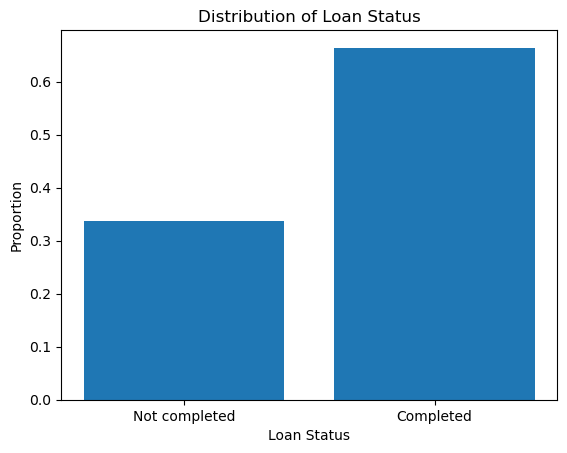

In [6]:
x=df["LoanStatus"].unique()
y=df["LoanStatus"].value_counts(normalize=True)
plt.bar(x, y)
plt.xticks([0,1], ["Not completed", "Completed"])
plt.xlabel("Loan Status")
plt.ylabel("Proportion")
plt.title("Distribution of Loan Status");

## Relationship between Monthly income and Loan Status

The box plot below shows the relationship between income and the loan status. The label 1 represents completed loans, 
while 0 for those not completed. It is seen that the imcome is a bit higher amongst those that completed their loans.


Text(0.5, 1.0, 'Loan Status vs Monthly Income')

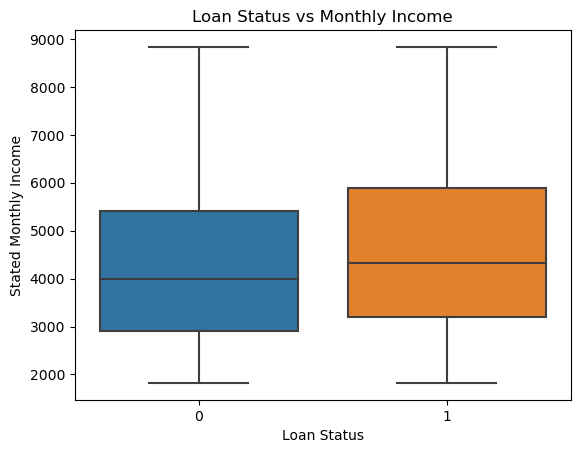

In [7]:
# create a boxplot for the loan status against income
sb.boxplot(data=df, x="LoanStatus", y="StatedMonthlyIncome")
plt.xlabel("Loan Status")
plt.ylabel("Stated Monthly Income")
plt.title("Loan Status vs Monthly Income")

## Relationship between Loan Term and Loan Status

Looking at the chart below, loan terms of 12 months have a higher loan completion on the average as compared to those with
a longer term.



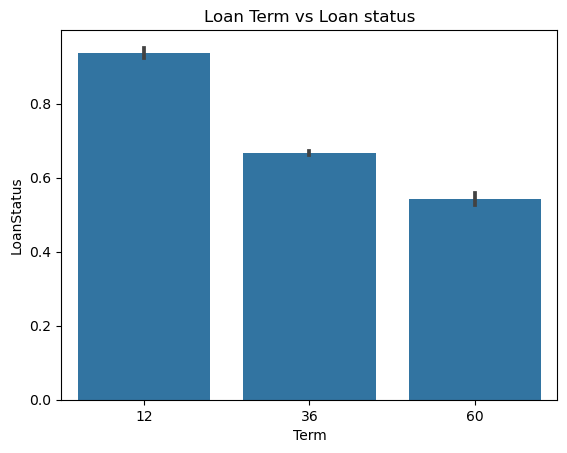

In [9]:
base_color = sb.color_palette()[0]
sb.barplot(x="Term", y="LoanStatus", data=df, color=base_color)
plt.title("Loan Term vs Loan status");

## Relationship Between Loan Amount, Interest rate and Loan Status

Using a scatter plot to visualize the relationship between loan amount and interest rates, then encoding it to show 
loan completion status using color. It can be seen that on the high side of both loan amount and interest rates, there 
is a higher chance of the loan not being completed.

Text(0.5, 1.0, 'Interest rate vs Loan Amount vs Loan Status')

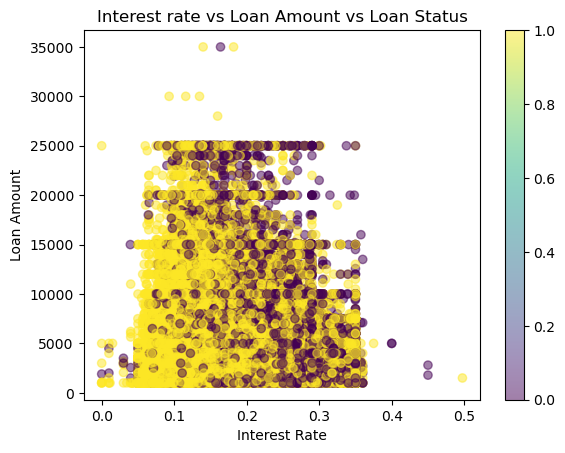

In [10]:
plt.scatter(data=df, x="BorrowerRate", y="LoanOriginalAmount", c="LoanStatus", alpha=0.5)
plt.colorbar()
plt.ylabel("Loan Amount")
plt.xlabel("Interest Rate")
plt.title("Interest rate vs Loan Amount vs Loan Status")

In [13]:
!jupyter nbconvert loan_data_explanatory.ipynb --to slides --post serve --no-input --no-prompt

^C
